<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/KNN/Copy_of_TTR_progetto_KNN_PCA_200_da_neurali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificatore: KNN

Features: estratte con PCA da feature estratte con reti neurali

In [ ]:
!wget https://www.dropbox.com/s/45gqwwfiuwfczcq/features_PCA_200_da_neurali.zip?dl=0
!unzip features_PCA_200_da_neurali.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-13 14:08:43--  https://www.dropbox.com/s/45gqwwfiuwfczcq/features_PCA_200_da_neurali.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/45gqwwfiuwfczcq/features_PCA_200_da_neurali.zip [following]
--2022-05-13 14:08:43--  https://www.dropbox.com/s/raw/45gqwwfiuwfczcq/features_PCA_200_da_neurali.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca524d9fe5a1c67cd0a3b85afd0.dl.dropboxusercontent.com/cd/0/inline/BlMC10NjE80KG2XjwwHWzoNklPnPIvS8c3jo9153DGJ8d0wsOX6s8VTW6wkMJtXAlRu0T0cJuNU1fTCY60Dv0ownZPuvEinvMXn6l879wPyRls5wuMVcNqyjVz2B_JssiNtt1veGgLEPCQQFrgwxrqaSeDZs3yYVz0HlmRemiYkPcQ/file# [following]
--2022-05-13 14:08:43--  https://uca524d9fe5a1c67cd0a3b85afd0.dl.dropboxusercontent.com/cd/0/inline/BlMC10

In [ ]:

import numpy as np

# 1. Carico in memoria il dataset
x_train = np.load('features_PCA_200_da_neurali/features_train_PCA_200_da_neurali.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test = np.load('features_PCA_200_da_neurali/features_test_PCA_200_da_neurali.npy')
y_test = np.load('array_labels/array_test_labels.npy')

31805 200


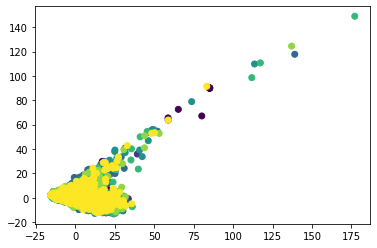

In [ ]:
# Analizzo i dati

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)

# Capisco come sono i dati: scatter plot
from matplotlib import pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()

In [ ]:
# Inizializzo i parametri

K = 1
fun = 'hamming'

# Calcolo la distanza fra tutti gli oggetti di train e gli oggetti di test

from scipy.spatial.distance import cdist

D = cdist(x_train,x_test,metric=fun)
 
# Per ogni dato di test (argomento axis=0), ordino le distanze dalla più piccola alla più grande e trovo gli indici di train dei più vicini
# Tengo solo i primi K

neighbors = np.argsort(D, axis=0)

k_neighbors = neighbors[:K, :]

# Controllo le etichette di questi K punti: devo trovare la più frequente:
#     - Ottengo le etichette dei punti vicini
#     - Trovo l'etichetta più frequente! Utilizzo la moda!

neighbors_labels = y_train[k_neighbors]


from scipy import stats
prediction = stats.mode(neighbors_labels, axis=0)[0]
print(np.shape(prediction))
print(prediction[:20])


# Calcolo l'accuratezza
accuracy = np.sum(prediction == y_test) / len(y_test)
print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')


(1, 7178)
[[0 0 0 ... 0 0 0]]
Accuratezza del classificatore: 13.35%


In [ ]:
length = prediction.shape[1]
print(length)
print(prediction[:20])

predicted = np.reshape(prediction, length)

print(np.shape(predicted))
print(predicted[:20])

7178
[[0 0 0 ... 0 0 0]]
(7178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# matrice di confusione

cmc = np.zeros((7,7))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0


In [ ]:
# calcolo accuratezza, precision e recall media rispetto alle 7 classi

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision = []
recall = []
for i in range(7):
  precision.append(cmc[i,i]/ np.sum(cmc[:,i]))
  recall.append(cmc[i,i]/ np.sum(cmc[i,:]))

precision = np.asarray(precision)
recall  = np.asarray(recall)

print(np.shape(precision))
print(np.shape(recall))

precision_m = np.mean(precision)
recall_m = np.mean(recall)

print(np.shape(precision_m))
print(np.shape(recall_m))
print(precision_m)
print(recall_m)

print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precisione media del classificatore: ' + "{0:.2f}".format(precision_m))
print('Recall media del classificatore: ' + "{0:.2f}".format(recall_m))

(7,)
(7,)
()
()
nan
0.14285714285714285
Accuratezza del classificatore: 13.35%
Precisione media del classificatore: nan
Recall media del classificatore: 0.14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


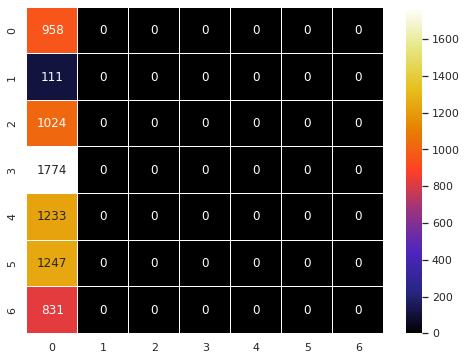

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns; 


plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc, annot=True,fmt=".0f", linewidths=.1, cmap="CMRmap")

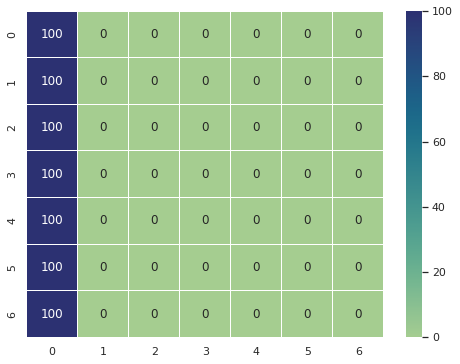

In [ ]:
# ATTENZIONE, con questo codice vengono cambiati i valori della matrice cmc
# viene fatto solo per plottare con le percentuali
# al termine, riaggiornare la matrice di confusione

cmc2 = cmc

for i in range(7):
  total = 0
  for j in range(7):
    total += cmc[i,j]
  for j in range(7):
    cmc2[i,j] = cmc[i,j]*100/total
  
plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc2, annot=True,vmin=0.0, vmax=100.0,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")

(7,)
(7,)
()
()
0.6638404291885284
0.6638404291885284
Accuratezza del classificatore: 66.54%
Precisione media del classificatore: 0.66
Recall media del classificatore: 0.66
